# Assignment 3
# Decision Tree

In [106]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=254)

In [108]:
model = DecisionTreeClassifier(max_depth = 2, random_state=255)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,255
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


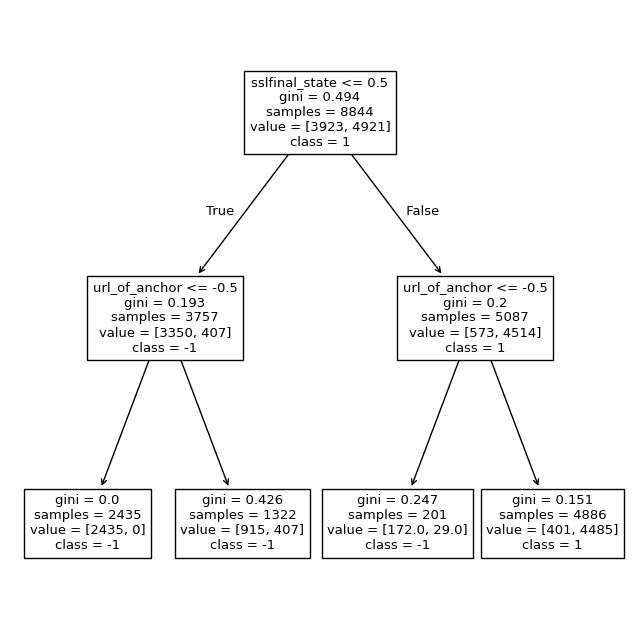

In [109]:

fig = plt.figure(figsize = (8,8))
plot_tree(model, feature_names = X.keys(), class_names=[str(c) for c in model.classes_])
plt.show()

In [110]:
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[ 903,   72],
       [ 127, 1109]])

In [111]:
from sklearn.metrics import classification_report

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.88      0.93      0.90       975
           1       0.94      0.90      0.92      1236

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



### Instructions
```
if ssl > 1 year old and trusted issuer  
    if >67% URL of Anchors<a> are different than the website OR anchors link nowhere  
        PHISHING  
    else  
        LIKELY PHISHING  
else  
    if >67% URL of Anchors<a> are different than the website OR anchors link nowhere  
        LIKELY PHISHING  
    else  
        LIKELY LEGITIMATE  
        

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#using both cross validation and splitting validation separately

forestModel = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.3, random_state=256)
forestModel.fit(X_train,y_train)
cv_scores = cross_val_score(forestModel, X, y, cv=10)
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.98462929 0.98462929 0.97016275 0.98282098 0.97830018 0.97375566
 0.95927602 0.95294118 0.96561086 0.95927602]
Overall accuracy (avg. of folds): 0.9711


Going lower and lower on max_features seems to increase the overall accuracy a bit but it's all within +-0.002

In [156]:
print (forestModel.feature_importances_)
X.keys()

[0.0110878  0.0074683  0.00364087 0.00443943 0.00282008 0.03288274
 0.05574997 0.39134286 0.01308319 0.00292503 0.00188231 0.00498381
 0.01654337 0.23149232 0.03873399 0.01528536 0.00472546 0.00313034
 0.00448668 0.00254116 0.00089941 0.00323479 0.00144392 0.01533704
 0.01059323 0.07382334 0.01037401 0.0122415  0.01874875 0.00405895]


Index(['having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'sslfinal_state', 'domain_registration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe',
       'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report'],
      dtype='object')

We can see 'sslfinal_state' and 'url_of_anchor' are very important here as was the case with the decision tree

In [157]:
from sklearn.metrics import accuracy_score
Y_pred = forestModel.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
print(classification_report(y_test, Y_pred))


Confusion matrix:
[[ 938   37]
 [  30 1206]]
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       975
           1       0.97      0.98      0.97      1236

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



Random forest is quite a lot more accurate than a single decision tree in this scenario